In [417]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [418]:
df = pd.read_csv('prices_bitcoin.csv')

In [419]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,"Apr 25, 2018","9,701.03","9,745.32","8,799.84","8,845.74","11,083,100,000","164,893,000,000"
1,1,"Apr 24, 2018","8,934.34","9,732.61","8,927.83","9,697.50","10,678,800,000","151,844,000,000"
2,2,"Apr 23, 2018","8,794.39","8,958.55","8,788.81","8,930.88","6,925,190,000","149,448,000,000"
3,3,"Apr 22, 2018","8,925.06","9,001.64","8,779.61","8,802.46","6,629,900,000","151,651,000,000"
4,4,"Apr 21, 2018","8,848.79","8,997.57","8,652.15","8,895.58","7,548,550,000","150,337,000,000"


In [420]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [421]:
df['Date']= pd.to_datetime(df['Date'])

In [422]:
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)

In [423]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [424]:
%matplotlib inline

In [425]:
df_test1 = df[(df['Date']>dt.datetime(2014,12,31))&(df['Date']<dt.datetime(2018,1,1))]
df_test1.reset_index(drop=True,inplace=True)

In [426]:
df_test1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-01-01,320.44,320.44,314.00,314.25,"8,036,550","4,380,820,000"
1,2015-01-02,314.08,315.84,313.57,315.03,"7,860,650","4,295,210,000"
2,2015-01-03,314.85,315.15,281.08,281.08,"33,054,400","4,307,010,000"
3,2015-01-04,281.15,287.23,257.61,264.20,"55,629,100","3,847,150,000"
4,2015-01-05,265.08,278.34,265.08,274.47,"43,962,800","3,628,490,000"


In [427]:
df_test1['Volume']=df_test1['Volume'].apply(lambda x: float(x.replace(',','')))
df_test1['Close']=df_test1['Close'].apply(lambda x: float(x.replace(',','')))
df_test1['Market Cap']=df_test1['Market Cap'].apply(lambda x: float(x.replace(',','')))

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

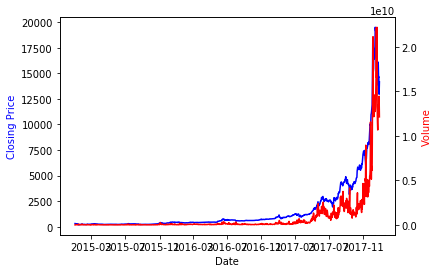

In [428]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='blue')
ax1.plot(df_test1['Date'],df_test1['Close'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Volume', color = "red")
ax2.plot(df_test1['Date'],df_test1['Volume'],color='red')
plt.show()

In [429]:
from twitter_clean import *

In [430]:
df_tweets = pd.read_json('new_cleaned.json',lines=True)

In [431]:
df_tweets.drop('_id',axis=1,inplace=True)

In [432]:
df_tweets.sort_values(by='time',inplace=True)
df_tweets.reset_index(drop=True,inplace=True)

In [433]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,1 Apr 2015
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,1 Apr 2015
2,15,en,1,16,the bitshares hq designed by is looking great!,1 Apr 2015
3,1,en,,1,current price is a joke!,1 Apr 2015
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,1 Apr 2015


In [434]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32218 entries, 0 to 32217
Data columns (total 6 columns):
favorite    32218 non-null object
language    32218 non-null object
reply       32218 non-null object
retweet     32218 non-null object
text        32218 non-null object
time        32218 non-null object
dtypes: object(6)
memory usage: 1.5+ MB


In [435]:
import datetime as dt
df_tweets['time']=pd.to_datetime(df_tweets['time'])

In [436]:
df_tweets.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [437]:
df_tweets_test = df_tweets[(df_tweets['time']>dt.datetime(2014,12,31))&(df_tweets['time']<dt.datetime(2018,1,2))]

In [438]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,5,overstock invests million in peernova in first...,2015-04-01
1,4,en,5,4,breaking: has unveiled its very killer â â€¦pi...,2015-04-01
2,15,en,1,16,the bitshares hq designed by is looking great!,2015-04-01
3,1,en,,1,current price is a joke!,2015-04-01
4,2,en,,2,200 mbtc that's 0 2 free roll tourney on thurs...,2015-04-01


In [439]:
df_tweets_test.sort_values(by='time',inplace=True)

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [440]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
379,1,en,,,gets its first tv ads: â â€¦,2015-01-01
395,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
394,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
393,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
392,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [441]:
df_tweets_test.reset_index(drop=True,inplace=True)

In [442]:
df_tweets_test.head()

,favorite,language,reply,retweet,text,time
0,1,en,,,gets its first tv ads: â â€¦,2015-01-01
1,1,en,1,,tech 2015: block chain will break free from bi...,2015-01-01
2,2,en,,4,bitcoin marketing in 2015 should focus on cons...,2015-01-01
3,3,en,,2,rt : 's future lies in the billions of underba...,2015-01-01
4,1,en,,2,new post how one startup wants to reimagine bi...,2015-01-01


In [443]:
df_tweets_test_text = pd.pivot_table(df_tweets_test, index=['time'],values=['text'],aggfunc=lambda x: '.'.join(x))

In [444]:
df_tweets_test_text['text']=df_tweets_test_text['text'].apply(lambda x:str(x))

In [445]:
df_tweets_test_text.head()

,text
time,
2015-01-01,gets its first tv ads: â â€¦.tech 2015: block ...
2015-01-02,isg3d sells 3d printers and offers 3d printing...
2015-01-03,we have opened vs market â wish you happy trad...
2015-01-04,i assume more tweets about bitcoin have been e...
2015-01-05,watches designed for our bitcoin family! | wat...


In [446]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [447]:
def sentence_sentiment(string):
    sent = analyser.polarity_scores(string)
    return sent

In [448]:
df_tweets_test_text['Sentiment']=df_tweets_test_text['text'].apply(sentence_sentiment)

In [449]:
df_tweets_test_text.reset_index(inplace=True)

In [450]:
df_tweets_test_text = pd.concat([df_tweets_test_text.drop(['Sentiment'], axis=1), df_tweets_test_text['Sentiment'].apply(pd.Series)], axis=1)

In [451]:
from sklearn import preprocessing

x = df_test1[['Volume']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Volume',axis=1),pd.DataFrame(x_scaled,columns=['Volume_scaled'])],axis=1)
#df_test1['Volume_scaled'] = pd.DataFrame(x_scaled)

In [452]:
df_test1.head()

,Date,Open,High,Low,Close,Market Cap,Volume_scaled
0,2015-01-01,320.44,320.44,314.00,314.25,4.380820e+09,0.000008
1,2015-01-02,314.08,315.84,313.57,315.03,4.295210e+09,0.000000
2,2015-01-03,314.85,315.15,281.08,281.08,4.307010e+09,0.001135
3,2015-01-04,281.15,287.23,257.61,264.20,3.847150e+09,0.002153
4,2015-01-05,265.08,278.34,265.08,274.47,3.628490e+09,0.001627


In [453]:
x = df_test1[['Close']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1.drop('Close',axis=1),pd.DataFrame(x_scaled,columns=['Close_scaled'])],axis=1)

In [454]:
df_test1.drop('Open',axis=1,inplace=True)
df_test1.drop('High',axis=1,inplace=True)
df_test1.drop('Low',axis=1,inplace=True)
df_test1.drop('Market Cap',axis=1,inplace=True)

In [455]:
df_test1.head()

,Date,Volume_scaled,Close_scaled
0,2015-01-01,0.000008,0.007047
1,2015-01-02,0.000000,0.007088
2,2015-01-03,0.001135,0.005330
3,2015-01-04,0.002153,0.004457
4,2015-01-05,0.001627,0.004988


In [456]:
df_tweets_test_text.head()

,time,text,compound,neg,neu,pos
0,2015-01-01,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131
1,2015-01-02,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078
2,2015-01-03,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154
3,2015-01-04,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083
4,2015-01-05,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051


In [457]:
df_tweets_test_text.columns = ['Date','Tweets','Compound','Negative','Neutral','Positive']

In [458]:
merged_data = pd.merge(left=df_test1,right=df_tweets_test_text,on='Date',how='outer')

In [459]:
merged_data.sort_values(by='Date',inplace=True)

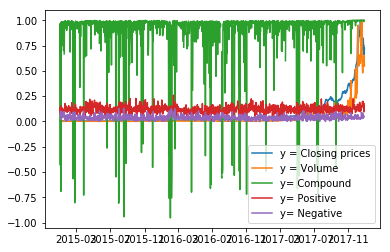

In [460]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound'])
plt.plot(merged_data['Date'],merged_data['Positive'])
plt.plot(merged_data['Date'],merged_data['Negative'])
plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [461]:
df_tweets_values = pd.DataFrame(df_tweets_test['time'].value_counts())

In [462]:
df_tweets_values.sort_index(inplace=True)

In [463]:
df_tweets_values.reset_index(inplace=True)
df_tweets_values.columns=['Date','count']

In [464]:
df_tweets_values.head()

,Date,count
0,2015-01-01,31
1,2015-01-02,27
2,2015-01-03,37
3,2015-01-04,30
4,2015-01-05,26


In [465]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051


In [466]:
merged_data=merged_data.merge(df_tweets_values,on='Date')

In [467]:
merged_data.head()

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.9625,0.073,0.796,0.131,31
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-0.4322,0.072,0.850,0.078,27
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.9700,0.100,0.745,0.154,37
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-0.6916,0.094,0.823,0.083,30
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.7810,0.019,0.929,0.051,26


In [468]:
merged_data['Negative_m']=merged_data.apply(lambda row: row['Negative']*int(row['count']),axis=1)
merged_data['Neutral_m']=merged_data.apply(lambda row: row['Neutral']*int(row['count']),axis=1)
merged_data['Positive_m']=merged_data.apply(lambda row: row['Positive']*int(row['count']),axis=1)
merged_data['Compound']=merged_data.apply(lambda row: row['Compound']*int(row['count']),axis=1)

In [469]:
merged_data

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,29.8375,0.073,0.796,0.131,31,2.263,24.676,4.061
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-11.6694,0.072,0.850,0.078,27,1.944,22.950,2.106
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,35.8900,0.100,0.745,0.154,37,3.700,27.565,5.698
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-20.7480,0.094,0.823,0.083,30,2.820,24.690,2.490
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,20.3060,0.019,0.929,0.051,26,0.494,24.154,1.326
5,2015-01-06,0.000693,0.005595,keeping score at the 2014 bitcoin bowl: by chr...,31.5456,0.027,0.853,0.120,32,0.864,27.296,3.840
6,2015-01-07,0.000766,0.006017,together! never change a winning team!.don't m...,22.4490,0.093,0.796,0.111,30,2.790,23.880,3.330
7,2015-01-08,0.000546,0.005448,mining now! ~14 days left for pow add a pool t...,28.5360,0.039,0.826,0.135,29,1.131,23.954,3.915
8,2015-01-09,0.000489,0.005813,shooting commercial video for stories from the...,23.3610,0.038,0.888,0.074,26,0.988,23.088,1.924
9,2015-01-10,0.000334,0.005005,"banksâ€¦ most subsidized industry in us, also ...",29.3353,0.055,0.853,0.092,31,1.705,26.443,2.852


In [470]:
x = merged_data[['Negative_m']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Negative_scaled'])],axis=1)
x = merged_data[['Neutral_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Netral_scaled'])],axis=1)
x = merged_data[['Positive_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Positive_scaled'])],axis=1)
x = merged_data[['Compound']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Compound_scaled'])],axis=1)

In [471]:
merged_data

,Date,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
0,2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,29.8375,0.073,0.796,0.131,31,2.263,24.676,4.061,0.287475,0.266976,0.251013,0.474120
1,2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,-11.6694,0.072,0.850,0.078,27,1.944,22.950,2.106,0.246951,0.243559,0.123252,0.158384
2,2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,35.8900,0.100,0.745,0.154,37,3.700,27.565,5.698,0.470020,0.306172,0.357992,0.520160
3,2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,-20.7480,0.094,0.823,0.083,30,2.820,24.690,2.490,0.358232,0.267166,0.148347,0.089325
4,2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,20.3060,0.019,0.929,0.051,26,0.494,24.154,1.326,0.062754,0.259894,0.072278,0.401615
5,2015-01-06,0.000693,0.005595,keeping score at the 2014 bitcoin bowl: by chr...,31.5456,0.027,0.853,0.120,32,0.864,27.296,3.840,0.109756,0.302522,0.236570,0.487113
6,2015-01-07,0.000766,0.006017,together! never change a winning team!.don't m...,22.4490,0.093,0.796,0.111,30,2.790,23.880,3.330,0.354421,0.256176,0.203241,0.417917
7,2015-01-08,0.000546,0.005448,mining now! ~14 days left for pow add a pool t...,28.5360,0.039,0.826,0.135,29,1.131,23.954,3.915,0.143674,0.257180,0.241472,0.464219
8,2015-01-09,0.000489,0.005813,shooting commercial video for stories from the...,23.3610,0.038,0.888,0.074,26,0.988,23.088,1.924,0.125508,0.245431,0.111358,0.424854
9,2015-01-10,0.000334,0.005005,"banksâ€¦ most subsidized industry in us, also ...",29.3353,0.055,0.853,0.092,31,1.705,26.443,2.852,0.216590,0.290949,0.172004,0.470300


In [472]:
merged_data.drop(['Compound','Negative','Neutral','Positive','count','Negative_m','Neutral_m','Positive_m'],axis=1,inplace=True)

In [473]:
merged_data.index = pd.to_datetime(merged_data.pop('Date'))

In [474]:
merged_data.head()

,Volume_scaled,Close_scaled,Tweets,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
Date,,,,,,,
2015-01-01,0.000008,0.007047,gets its first tv ads: â â€¦.tech 2015: block ...,0.287475,0.266976,0.251013,0.474120
2015-01-02,0.000000,0.007088,isg3d sells 3d printers and offers 3d printing...,0.246951,0.243559,0.123252,0.158384
2015-01-03,0.001135,0.005330,we have opened vs market â wish you happy trad...,0.470020,0.306172,0.357992,0.520160
2015-01-04,0.002153,0.004457,i assume more tweets about bitcoin have been e...,0.358232,0.267166,0.148347,0.089325
2015-01-05,0.001627,0.004988,watches designed for our bitcoin family! | wat...,0.062754,0.259894,0.072278,0.401615


In [475]:
merged_data['Comp_ewma']=pd.ewma(merged_data['Compound_scaled'], span=30, freq="D")
merged_data['Posi_ewma']=pd.ewma(merged_data['Positive_scaled'], span=30, freq="D")
merged_data['Nega_ewma']=pd.ewma(merged_data['Negative_scaled'], span=30, freq="D")

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  This is separate from the ipykernel package so we can avoid doing imports u

In [476]:
merged_data.corr()

,Volume_scaled,Close_scaled,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Comp_ewma,Posi_ewma,Nega_ewma
Volume_scaled,1.000000,0.935293,0.428438,0.569265,0.552134,0.492954,0.842263,0.881524,0.687125
Close_scaled,0.935293,1.000000,0.359502,0.568748,0.533168,0.496943,0.877193,0.888105,0.688396
Negative_scaled,0.428438,0.359502,1.000000,0.497980,0.435546,0.267778,0.320697,0.374589,0.516417
Netral_scaled,0.569265,0.568748,0.497980,1.000000,0.761746,0.817940,0.609678,0.586993,0.480558
Positive_scaled,0.552134,0.533168,0.435546,0.761746,1.000000,0.801659,0.573082,0.628505,0.434191
Compound_scaled,0.492954,0.496943,0.267778,0.817940,0.801659,1.000000,0.596471,0.546535,0.346162
Comp_ewma,0.842263,0.877193,0.320697,0.609678,0.573082,0.596471,1.000000,0.915479,0.568175
Posi_ewma,0.881524,0.888105,0.374589,0.586993,0.628505,0.546535,0.915479,1.000000,0.690900
Nega_ewma,0.687125,0.688396,0.516417,0.480558,0.434191,0.346162,0.568175,0.690900,1.000000


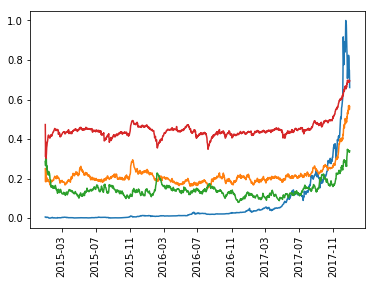

In [477]:
plt.plot(merged_data.index,merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data.index,merged_data['Posi_ewma'])
plt.plot(merged_data.index,merged_data['Nega_ewma'])
plt.plot(merged_data.index,merged_data['Comp_ewma'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
#plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [478]:
import math
X=merged_data['Close_scaled'].values
split=math.ceil(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.008071, mean2=0.141098
variance1=0.000034, variance2=0.035731


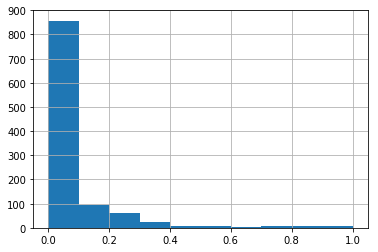

In [479]:
merged_data['Close_scaled'].hist()

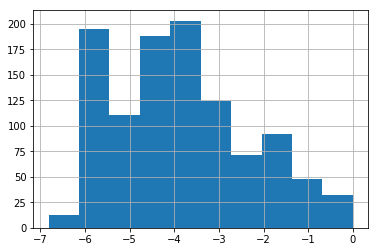

In [481]:
from numpy import log
merged_data['Log_close']=log(merged_data['Close_scaled'])
merged_data['Log_close'].hist()


In [482]:
from statsmodels.tsa.stattools import adfuller
X = merged_data['Log_close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.075284
p-value: 0.995000
Critical Values:
	10%: -2.568
	1%: -3.436
	5%: -2.864


In [483]:
import math
X=merged_data['Log_close'].values
split=math.ceil(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=-5.073178, mean2=-2.589198
variance1=0.517227, variance2=1.149322


In [484]:
merged_data['Close_pct_change']=merged_data['Close_scaled'].pct_change()

In [485]:
merged_data.dropna(how='any',inplace=True)

In [486]:
merged_data=merged_data[merged_data['Compound_scaled']>0]

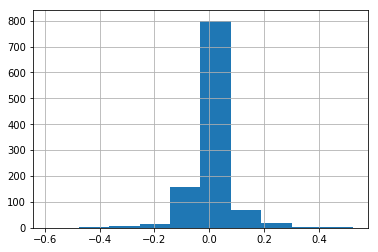

In [487]:
merged_data['Close_pct_change'].hist()

In [488]:
import math
X=merged_data['Close_pct_change'].values
split=math.ceil(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.007402, mean2=0.007262
variance1=0.009570, variance2=0.002145


In [489]:
from statsmodels.tsa.stattools import adfuller
X = merged_data['Close_pct_change'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.617818
p-value: 0.000000
Critical Values:
	10%: -2.568
	1%: -3.436
	5%: -2.864


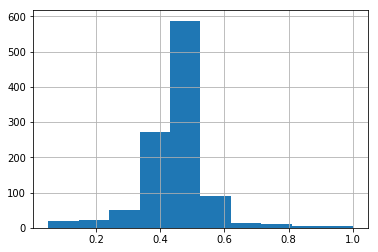

In [490]:
merged_data['Compound_scaled'].hist()

In [491]:
import math
X=merged_data['Compound_scaled'].values
split=math.ceil(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.438558, mean2=0.468040
variance1=0.007523, variance2=0.012989


In [492]:
from statsmodels.tsa.stattools import adfuller
X = merged_data['Compound_scaled'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.620869
p-value: 0.866196
Critical Values:
	10%: -2.568
	1%: -3.437
	5%: -2.864


In [495]:
merged_data['Log_comp']=log(merged_data['Compound_scaled'])

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [497]:
import math
X=merged_data['Log_comp'].values
split=math.ceil(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=-0.856114, mean2=-0.793779
variance1=0.086411, variance2=0.080888


In [509]:
from statsmodels.tsa.stattools import adfuller
X = merged_data['Log_comp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.988614
p-value: 0.035971
Critical Values:
	10%: -2.568
	1%: -3.437
	5%: -2.864


In [500]:
merged_data['Pct_change_ewma']=pd.ewma(merged_data['Close_pct_change'],span=120,freq='D')

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=120,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [503]:
merged_data['Log_comp_ewma']=pd.ewma(merged_data['Log_comp'],span=30,freq='D')

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(freq=D,ignore_na=False,span=30,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


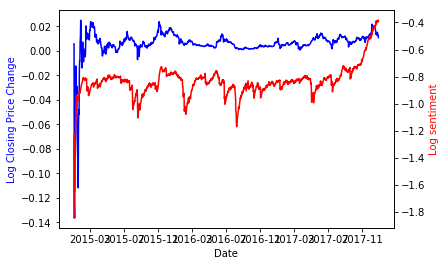

In [513]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Log Closing Price Change',color='blue')
ax1.plot(merged_data.index,merged_data['Pct_change_ewma'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Log sentiment', color = "red")
ax2.plot(merged_data.index,merged_data['Log_comp_ewma'],color='red')
plt.show()

In [ ]:
plt.plot(merged_data.index,merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data.index,merged_data['Negative_scaled'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
plt.legend(['Closing prices','Compound'],loc='upper right')#,'Positive','Negative'
plt.xticks(rotation=90)
plt.show()

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()

sns.regplot(x='Close_scaled',y='Compound_scaled',data=merged_data)

In [ ]:
import seaborn as sns
merged_data_test = merged_data.drop(['Open','High','Close','Volume','Neutral','Positive','Compound','Negative','count'],axis=1)
corr=merged_data_test.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
merged_data.reset_index(drop=True, inplace=True)

In [ ]:
from pandas.plotting import lag_plot

In [ ]:
lag_plot(merged_data['Compound_scaled'])

In [ ]:
lag_plot(merged_data['Close_scaled'])

In [ ]:
merged_data['Tweets']